# Name: Ahmed Mohamed Fekry Bagha
# ID: 4211032
# Group: (A) ~ Section: (B1)
# Deep Learning "XAI Assignment"

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

import shap
import lime
import lime.lime_tabular

from sklearn.inspection import PartialDependenceDisplay

## Load and Preprocess (Heart Disease Dataset)

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca', 'thal', 'target'
]

data = pd.read_csv(url, names=columns)

data.replace('?', np.nan, inplace=True)

data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

data.dropna(inplace=True)

X = data.drop('target', axis=1)
y = data['target']

y = y.apply(lambda x: 0 if x == 0 else 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and train XGBoost Model

In [7]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8333


S:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:49:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## XAI Methods: (1) LIME (Local Explanation)

In [9]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)

idx = 5  
exp = lime_explainer.explain_instance(X_test.iloc[idx].values, model.predict_proba)

exp.show_in_notebook(show_table=True)

## (2) SHAP (Global and Local Explanation)

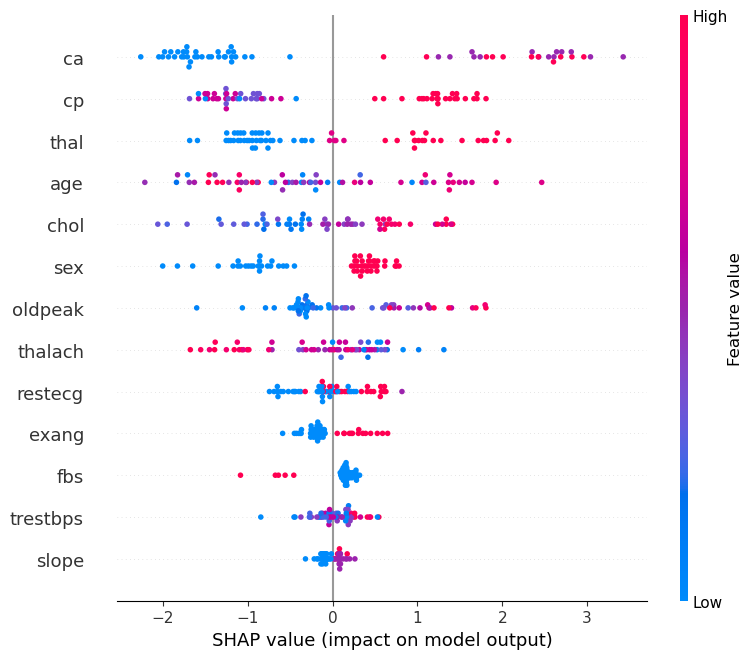

In [11]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[idx,:], X_test.iloc[idx,:])

## (3) PDP (Partial Dependence Plot)

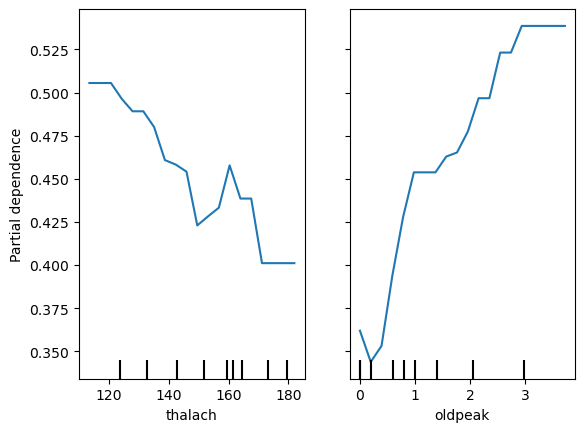

In [13]:
features = ['thalach', 'oldpeak']

PartialDependenceDisplay.from_estimator(model, X_test, features, grid_resolution=20)
plt.show()

## Explanations of the results of each XAI method

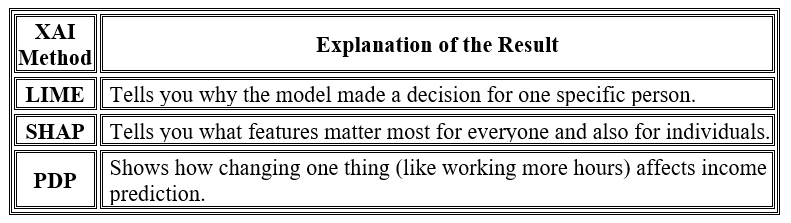

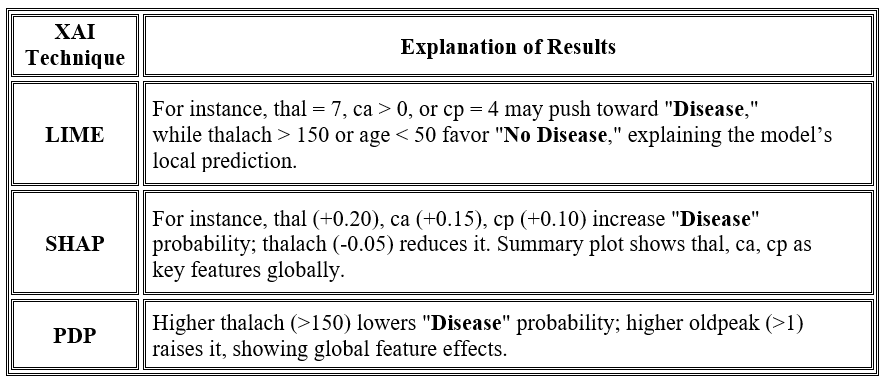

## Advantages and Disadvantages of each XAI technique

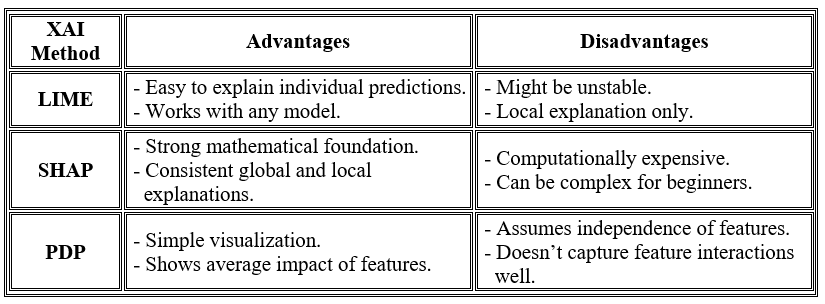